In [1]:
import os
import itertools
from math import sqrt, ceil
from statistics import mean
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy.stats import freedman_bin_width
from histsample2d_iglesias import shimazaki_2d, plot_hist2d, shimazaki_2d_with_plots

### Data for testing

In [2]:
folder = r"C:\Users\ldecarva\Documents\Data\gpd_sorting_output\archetypes_concatenated"

In [3]:
# data for test

tuile_file  = "len_40593-P1-I-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv"
ardoise_file = "len_57251-P1-I-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv"

tuile = pd.read_csv(rf"{folder}\{tuile_file}")
ardoise = pd.read_csv(rf"{folder}\{ardoise_file}")


tuile_dpe = tuile[tuile['adedpe202006_logtype_ph_u'].notna()]
ardoise_dpe = ardoise[ardoise['adedpe202006_logtype_ph_u'].notna()]

print("len tuile", len(tuile))
print("len tuile_dpe", len(tuile_dpe))
print("\nlen ardoise", len(ardoise))
print("len ardoise_dpe", len(ardoise_dpe))

C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (42,43,44,45,46,47,48,49,67,125,147,191,197,214,240,291,293,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len tuile 40593
len tuile_dpe 1931

len ardoise 57251
len ardoise_dpe 4016


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (42,43,44,45,46,47,48,49,147,191,197,214,291,292,293,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Density function

## Histogram density estimation

### Methods for determining histogram bins

#### Tests with Shimazaki and Shinomoto method

In [6]:
# Take sample same sizes
size_sample = 1900
data_tuile = random.sample(list(tuile_dpe.adedpe202006_logtype_ph_u), size_sample)
data_ardoise = random.sample(list(ardoise_dpe.adedpe202006_logtype_ph_u), size_sample)

1
# -8970165.535272446 N bins x 99 0.024444444444444442
# -8970165.535272446 N bins y 93 0.026129032258064518


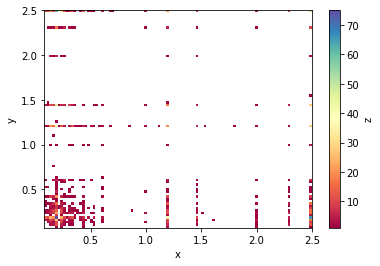

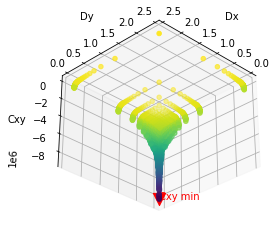

In [7]:
# Make a 2D histogram based on Shimazaki and Shinomoto
# used an external code for function shimazaki_2d, found in:
# https://www.neuralengine.org/res/histogram.html
shimazaki_2d_with_plots(data_tuile, data_ardoise)

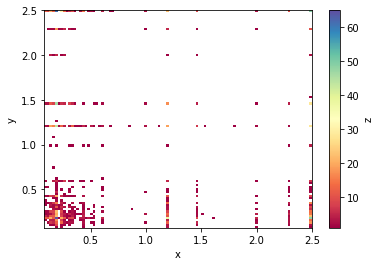

In [8]:
# Just the 2D histogram plot, without the bins optimization codes
plot_hist2d(data_tuile, data_ardoise, 99, 99)

#### Comparison with Freedman-Diaconis rule

In [9]:
# Check number of bins for both rules in the test file
# Freedman-Diaconis rule
fr_bin_len_tui = freedman_bin_width(data_tuile)  
fr_bin_len_ard = freedman_bin_width(data_ardoise)  

k_tuile = (max(data_tuile) - min(data_tuile)) / fr_bin_len_tui    # Freedman-Diaconis rule
k_ardoise = (max(data_ardoise) - min(data_ardoise)) / fr_bin_len_ard  # Freedman-Diaconis rule
v_bins = ceil(mean([k_tuile,k_ardoise]))
print( f'Freedman  - N bins x  {k_tuile:.2f},  - len bin x  {fr_bin_len_tui:.2f}')
print( f'Freedman  - N bins y  {k_ardoise:.2f},  - len bin y  {fr_bin_len_ard:.2f}')
# Shimazaki rule
shimazaki_2d(data_tuile, data_ardoise)

Freedman  - N bins x  14.84,  - len bin x  0.16
Freedman  - N bins y  11.94,  - len bin y  0.20
1
Shimazaki  - N bins x  99,  - len bin x  0.02
Shimazaki  - N bins y  93,  - len bin y  0.03


([99, 93], [0.024444444444444442, 0.026129032258064518])

In [3]:
# Generalize to a function
def number_bins_fred_shima(title, data_tuile,data_ardoise):
    # Freedman-Diaconis rule
    fr_bin_len_tui = freedman_bin_width(data_tuile)  
    fr_bin_len_ard = freedman_bin_width(data_ardoise)  

    k_tuile = (max(data_tuile) - min(data_tuile)) / fr_bin_len_tui    # Freedman-Diaconis rule
    k_ardoise = (max(data_ardoise) - min(data_ardoise)) / fr_bin_len_ard  # Freedman-Diaconis rule
    v_bins = ceil(mean([k_tuile,k_ardoise]))
    print("\n",title)
    print( f'Freedman  - N bins x  {k_tuile:.2f},  - len bin x  {fr_bin_len_tui:.2f}')
    print( f'Freedman  - N bins y  {k_ardoise:.2f},  - len bin y  {fr_bin_len_ard:.2f}')
    # Shimazaki rule
    shimazaki_2d(data_tuile, data_ardoise)

In [11]:
# Cases for selected to compare ceiling thermal performance
to_analyse_pairs = [ ['len_1956-P2-I-COMMERCE-FRANCE_ARDOISE.csv',
                      'len_2513-P2-I-COMMERCE-FRANCE_TUILE.csv'],
                     ['len_40593-P1-I-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv',
                      'len_57251-P1-I-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv'],
                    ['len_1161416-P3-P-HABITAT-FRANCE_TUILE.csv',
                      'len_834454-P3-P-HABITAT-FRANCE_ARDOISE.csv'],
                     ['len_1207450-P1-P-HABITAT-FRANCE_BRIQUE_TUILE.csv',
                      'len_836506-P1-P-HABITAT-FRANCE_BRIQUE_ARDOISE.csv'],
                     ['len_1186724-P2-P-HABITAT-FRANCE_ARDOISE.csv',
                      'len_1689405-P2-P-HABITAT-FRANCE_TUILE.csv'],
                     ]

In [25]:
# Apply function to all desirable comparisons
for pair in to_analyse_pairs:
    # define which file is "tuile" and which is "ardoise"
    if "TUILE" in pair[0]:
        tuile_file = pair[0]
        ardoise_file = pair[1]
    else:
        tuile_file = pair[1]
        ardoise_file = pair[0]  
    print("\ntuile :",tuile_file)
    print("ardoise :",ardoise_file)   

    # read csv
    tuile = pd.read_csv(rf"{folder}\{tuile_file}")
    ardoise = pd.read_csv(rf"{folder}\{ardoise_file}")

    # select dpe data for the ceiling 
    tuile_dpe = tuile[tuile['adedpe202006_logtype_ph_u'].notna()]
    ardoise_dpe = ardoise[ardoise['adedpe202006_logtype_ph_u'].notna()]
    
    size_sample = int(min(len(tuile_dpe),len(ardoise_dpe)) / 2)
    print("size_sample: ", size_sample, " - len tuile: ", len(tuile_dpe), " - len ardoise: ",len(ardoise_dpe))
    data_tuile = random.sample(list(tuile_dpe.adedpe202006_logtype_ph_u), size_sample)
    data_ardoise = random.sample(list(ardoise_dpe.adedpe202006_logtype_ph_u), size_sample)

    print(f"min: {min(data_tuile)}, max: {max(data_tuile)}, n of values: {len(set(data_tuile))}")
    print(f"min: {min(data_ardoise)}, max: {max(data_ardoise)}, n of values: {len(set(data_ardoise))}")
    
    # define title 
    title_start = "-".join(tuile_file.split("-")[1:-1]) 
    title_wall = "_".join(tuile_file.split("-")[-1].split("_")[:-1])
    title = '-'.join([title_start, title_wall])

    number_bins_fred_shima( title, data_tuile, data_ardoise)


tuile : len_2513-P2-I-COMMERCE-FRANCE_TUILE.csv
ardoise : len_1956-P2-I-COMMERCE-FRANCE_ARDOISE.csv
size_sample:  159  - len tuile:  339  - len ardoise:  318
min: 0.1, max: 2.5, n of values: 37
min: 0.08, max: 2.5, n of values: 38

 P2-I-COMMERCE-FRANCE
Freedman  - N bins x  2.83,  - len bin x  0.85
Freedman  - N bins y  3.11,  - len bin y  0.78
1
Shimazaki  - N bins x  95,  - len bin x  0.03
Shimazaki  - N bins y  98,  - len bin y  0.02

tuile : len_40593-P1-I-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv
ardoise : len_57251-P1-I-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (42,43,44,45,46,47,48,49,67,125,147,191,197,214,240,291,293,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (42,43,44,45,46,47,48,49,147,191,197,214,291,292,293,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


size_sample:  965  - len tuile:  1931  - len ardoise:  4016
min: 0.08, max: 2.5, n of values: 52
min: 0.08, max: 2.5, n of values: 53

 P1-I-HABITAT-FRANCE_PIERRE_GRES
Freedman  - N bins x  11.84,  - len bin x  0.20
Freedman  - N bins y  9.49,  - len bin y  0.26
1
Shimazaki  - N bins x  98,  - len bin x  0.02
Shimazaki  - N bins y  99,  - len bin y  0.02

tuile : len_1161416-P3-P-HABITAT-FRANCE_TUILE.csv
ardoise : len_834454-P3-P-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,107,119,120,122,125,142,147,150,190,191,192,193,197,214,240,242,243,287,291,292,293,294,295,296,297,299,322,325,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,125,147,191,197,214,240,242,243,291,292,293,294,295,296,297,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


size_sample:  40509  - len tuile:  106813  - len ardoise:  81018
min: 0.05, max: 2.5, n of values: 101
min: 0.05, max: 2.5, n of values: 100

 P3-P-HABITAT-FRANCE
Freedman  - N bins x  191.23,  - len bin x  0.01
Freedman  - N bins y  191.23,  - len bin y  0.01
1
Shimazaki  - N bins x  97,  - len bin x  0.03
Shimazaki  - N bins y  96,  - len bin y  0.03

tuile : len_1207450-P1-P-HABITAT-FRANCE_BRIQUE_TUILE.csv
ardoise : len_836506-P1-P-HABITAT-FRANCE_BRIQUE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,125,142,147,150,191,192,193,240,242,243,291,292,293,294,295,296,300,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,125,142,147,150,191,240,291,292,293,294,295,296,297,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


size_sample:  7159  - len tuile:  21258  - len ardoise:  14318
min: 0.06, max: 2.5, n of values: 81
min: 0.06, max: 2.5, n of values: 79

 P1-P-HABITAT-FRANCE_BRIQUE
Freedman  - N bins x  55.98,  - len bin x  0.04
Freedman  - N bins y  94.05,  - len bin y  0.03
1
Shimazaki  - N bins x  87,  - len bin x  0.03
Shimazaki  - N bins y  87,  - len bin y  0.03

tuile : len_1689405-P2-P-HABITAT-FRANCE_TUILE.csv
ardoise : len_1186724-P2-P-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,119,120,122,125,132,142,147,150,191,192,193,197,214,240,242,243,287,291,292,293,294,295,296,297,300,322,325,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,107,125,147,190,191,197,214,240,242,243,291,292,293,294,295,296,297,299,300,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


size_sample:  77453  - len tuile:  199674  - len ardoise:  154907
min: 0.05, max: 4.17, n of values: 127
min: 0.05, max: 4.4, n of values: 126

 P2-P-HABITAT-FRANCE
Freedman  - N bins x  219.53,  - len bin x  0.02
Freedman  - N bins y  226.13,  - len bin y  0.02
1
Shimazaki  - N bins x  99,  - len bin x  0.04
Shimazaki  - N bins y  89,  - len bin y  0.05


## Non parametrical  Kernel Density Estimation
### First test

In [49]:
from numpy.random import normal
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [43]:
sample = tuile_dpe.adedpe202006_logtype_ph_u.to_numpy()
sample = tuile_dpe[["adedpe202006_logtype_ph_u"]]
print(len(sample))

199674


In [44]:
# fit density
model = KernelDensity(bandwidth=0.05, kernel='gaussian')
# sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(bandwidth=0.05)

In [57]:
# sample probabilities for a range of outcomes
values = np.asarray([value for value in range(0, 4)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

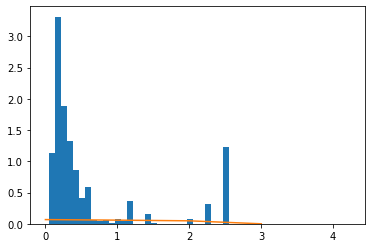

In [60]:
# plot the histogram and pdf
plt.hist(sample, bins=50, density=True)
plt.plot(values, probabilities)
plt.show()

## Density estimation for each sample value

294
242


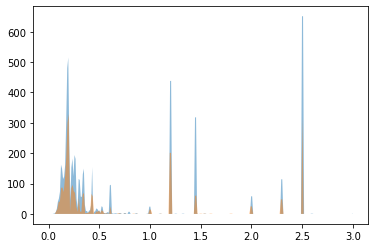

In [7]:
# Inspired from https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
# Calculate a density function and present the result in absolute frequency

x_ard = ardoise_dpe.adedpe202006_logtype_ph_u.to_numpy()
len_dens_ard = round((max(x_ard) - min(x_ard))/0.01)
print(len_dens_ard)

x_d_ard = np.linspace(0, 3, len_dens_ard)
density_ard = sum((abs(xi - x_d_ard) < 0.01) for xi in x_ard)
unity_density_ard = density_ard / density_ard.sum()


x_tui = tuile_dpe.adedpe202006_logtype_ph_u.to_numpy()
len_dens_tui = round((max(x_tui) - min(x_tui))/0.01)
print(len_dens_tui)

x_d_tui = np.linspace(0, 3, len_dens_tui)
density_tui = sum((abs(xi - x_d_tui) < 0.01) for xi in x_tui)
unity_density_tui = density_tui / density_tui.sum()    

# plt.fill_between(x_d_ard, unity_density_ard, alpha=0.5)
# plt.fill_between(x_d_tui, unity_density_tui, alpha=0.5)


plt.fill_between(x_d_ard, density_ard, alpha=0.5)
plt.fill_between(x_d_tui, density_tui, alpha=0.5)
# plt.plot(x_tui, np.full_like(x_tui, -0.1), '|k', markeredgewidth=1)
# plt.plot(x_ard, np.full_like(x_ard, -0.1), '|k', markeredgewidth=1)



len_dens_ard 295
len_dens_tui 243


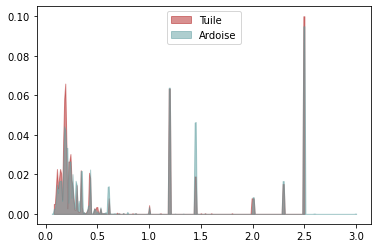

In [68]:
# Improved from above 
# Create density and unity density for each data
x_ard = ardoise_dpe.adedpe202006_logtype_ph_u.to_numpy()
len_dens_ard = round((max(x_ard) - min(x_ard))/0.01)+1
print("len_dens_ard", len_dens_ard)
x_d_ard = np.linspace(min(x_ard), max(x_ard), len_dens_ard)
density_ard = sum((abs(xi - x_d_ard) < 0.01) for xi in x_ard)
unity_density_ard = density_ard / density_ard.sum()

x_tui = tuile_dpe.adedpe202006_logtype_ph_u.to_numpy()
len_dens_tui = round((max(x_tui) - min(x_tui))/0.01)+1
print("len_dens_tui",len_dens_tui)
x_d_tui = np.linspace(min(x_tui), max(x_tui), len_dens_tui)
density_tui = sum((abs(xi - x_d_tui) < 0.01) for xi in x_tui)
unity_density_tui = density_tui / density_tui.sum()    

#plot
format_ard = {"color":"cadetblue", "alpha":0.5, "label":'Ardoise'}
format_tui = {"color":"firebrick", "alpha":0.5, "label":'Tuile'}
plt.fill_between(x_d_tui, unity_density_tui, **format_tui)

plt.fill_between(x_d_ard, unity_density_ard, **format_ard)
plt.legend(loc=9)

# Kolmogorov-Smirnov 
- combined with last approach for density estimation (each sample value)

In [26]:
# Kolmogorov-Smirnov test for goodness of fit
k_s_test = stats.kstest(unity_density_tui,unity_density_ard)

print(k_s_test)
if k_s_test[1] < 0.05:
    print(f"P_value {k_s_test[1].round(3)} : reject the null hypothesis \nThe data are not distributed according to the other data, considering a significancy of 0.05 .")
else: 
    print(f"P_value {k_s_test[1].round(3)} : accept the null hypothesis \nThe data are distributed according to the other data, considering a significancy of 0.05 .")


KstestResult(statistic=0.05116096025186934, pvalue=0.854142370645372)
P_value 0.854 : accept the null hypothesis 
The data are distributed according to the other data, considering a significancy of 0.05 .


x_tui = tuile_dpe.adedpe202006_logtype_ph_u.to_numpy()
len_dens_tui = round((max(x_tui) - min(x_tui))/0.01)+1
print("len_dens_tui",len_dens_tui)
x_d_tui = np.linspace(min(x_tui), max(x_tui), len_dens_tui)
density_tui = sum((abs(xi - x_d_tui) < 0.01) for xi in x_tui)
unity_density_tui = density_tui / density_tui.sum()  

type(unity_density_tui)

In [5]:
# Function with uninty density and Kolmogorov-Smirnov test
def density_pdf_kolmogorov(title, tuile_dpe, ardoise_dpe):
    """ Create figure with density, and results of Kolmogorov-Smirnov test for goodness of fit """  
    
    #Create density and unity density for each data
    x_ard = ardoise_dpe.adedpe202006_logtype_ph_u.to_numpy()
    len_dens_ard = round((max(x_ard) - min(x_ard))/0.01)+1
    print("len_dens_ard", len_dens_ard)
    x_d_ard = np.linspace(min(x_ard), max(x_ard), len_dens_ard)
    density_ard = sum((abs(xi - x_d_ard) < 0.01) for xi in x_ard)
    unity_density_ard = density_ard / density_ard.sum()

    x_tui = tuile_dpe.adedpe202006_logtype_ph_u.to_numpy()
    len_dens_tui = round((max(x_tui) - min(x_tui))/0.01)+1
    print("len_dens_tui",len_dens_tui)
    x_d_tui = np.linspace(min(x_tui), max(x_tui), len_dens_tui)
    density_tui = sum((abs(xi - x_d_tui) < 0.01) for xi in x_tui)
    unity_density_tui = density_tui / density_tui.sum()    

    # Kolmogorov-Smirnov test for goodness of fit
    k_s_test = stats.kstest(unity_density_tui,unity_density_ard)
    # print(k_s_test)
    p_value = k_s_test[1]
    if p_value < 0.05:
        print(f"K-S P_value {p_value.round(3)}: reject the null hypothesis! \nSignificantly different data, considering a significancy of 0.05 .")
        hypot = "REJECT K-S"
    else: 
        print(f"YES! \nK-S P_value {p_value.round(3)}: accept the null hypothesis! \nNon significantly different data, considering a significancy of 0.05 .")
        hypot = "ACCEPT K-S"    
    
    
    
    
    # Chi-square
    size_sample = int(min(len(tuile_dpe),len(ardoise_dpe)))
    print("size_sample: ", size_sample, " - len tuile: ", len(tuile_dpe), " - len ardoise: ",len(ardoise_dpe))
    data_tuile_ = random.sample(list(tuile_dpe.adedpe202006_logtype_ph_u), size_sample)
    data_ardoise_ = random.sample(list(ardoise_dpe.adedpe202006_logtype_ph_u), size_sample)
    #Create density and unity density for each data with same size
    x_ard = data_ardoise_
    len_dens_ard = round((max(x_ard) - min(x_ard))/0.01)+1
    x_tui = data_tuile_
    len_dens_tui = round((max(x_tui) - min(x_tui))/0.01)+1
    lens_dens = min(len_dens_ard,len_dens_tui)
    print("len_dens_ard", len_dens_ard)
    print("len_dens_tui",len_dens_tui)
    print("len_dens",lens_dens)

    x_d_ard = np.linspace(min(x_ard), max(x_ard), lens_dens)
    density_ard = sum((abs(xi - x_d_ard) < 0.01) for xi in x_ard)
    unity_density_ard = density_ard / density_ard.sum()
    
    x_tui = data_tuile_
    len_dens_tui = round((max(x_tui) - min(x_tui))/0.01)+1
    x_d_tui = np.linspace(min(x_tui), max(x_tui), lens_dens)
    density_tui = sum((abs(xi - x_d_tui) < 0.01) for xi in x_tui)
    unity_density_tui = density_tui / density_tui.sum()
    
    chi_s_test = stats.chisquare(unity_density_tui, f_exp=unity_density_ard)
    chi_p_value = chi_s_test[1]
    if chi_p_value < 0.05:
        print(f"P_value {chi_p_value.round(3)}: reject the null hypothesis chi square! \nSignificantly different data, considering a significancy of 0.05 .")
        hypot_chi = "REJECT chi square"
    else: 
        print(f"YES! \nP_value {chi_p_value.round(3)}: accept the null hypothesis chi square! \nNon significantly different data, considering a significancy of 0.05 .")
        hypot_chi = "ACCEPT chi square"

    #plot
    fig, ax = plt.subplots()
    format_tui = {"color":"firebrick", "alpha":0.5, "label":f'Tuile ({len(x_tui)})'}
    ax.fill_between(x_d_tui, unity_density_tui, **format_tui)
    format_ard = {"color":"cadetblue", "alpha":0.6, "label":f'Ardoise ({len(x_ard)})'}
    ax.fill_between(x_d_ard, unity_density_ard, **format_ard)
    plt.legend(loc=9)
    # title= "test"
    fig.suptitle(f'{title}\nK-S p-v {p_value:.2f}: {hypot} - Chi p-v {chi_p_value:.2f}: {hypot_chi}', 
                 fontsize=13)
    plt.xlabel('U-valeur plancher haut [W/m²/K]', fontsize=12)
    plt.ylabel('Densité de probabilité', fontsize=12)

    fig.savefig(fr"plot_hist_pdf_cdf\pdf_kolmogorov\{title}_pdf_kolmogorov_Chi.png")
    return p_value, hypot, chi_p_value, hypot_chi

## Application to pairs

### Pairs with more than 500 cases and well balanced sizes

In [109]:
# pairs respecting the criteria of minimun sample size of 500 and a balanced size among pair elements
# (min(a,b) > 500 ) and(2 * dif < min(a,b)
to_analyse_pairs = [['len_1956-P2-I-COMMERCE-FRANCE_ARDOISE.csv',
                      'len_2513-P2-I-COMMERCE-FRANCE_TUILE.csv'],
                    ['len_40593-P1-I-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv',
                      'len_57251-P1-I-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv'],
                    ['len_1161416-P3-P-HABITAT-FRANCE_TUILE.csv',
                      'len_834454-P3-P-HABITAT-FRANCE_ARDOISE.csv'],
                    ['len_1207450-P1-P-HABITAT-FRANCE_BRIQUE_TUILE.csv',
                      'len_836506-P1-P-HABITAT-FRANCE_BRIQUE_ARDOISE.csv'],
                    ['len_1186724-P2-P-HABITAT-FRANCE_ARDOISE.csv',
                      'len_1689405-P2-P-HABITAT-FRANCE_TUILE.csv'],
                    ['len_1956-P2-I-COMMERCE-FRANCE_ARDOISE.csv',
                      'len_2513-P2-I-COMMERCE-FRANCE_TUILE.csv'],
]


tuile : len_2513-P2-I-COMMERCE-FRANCE_TUILE.csv
ardoise : len_1956-P2-I-COMMERCE-FRANCE_ARDOISE.csv
len_dens_ard 243
len_dens_tui 242
YES! 
P_value 0.942: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_40593-P1-I-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv
ardoise : len_57251-P1-I-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv
len_dens_ard 295
len_dens_tui 243
YES! 
P_value 0.191: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_1161416-P3-P-HABITAT-FRANCE_TUILE.csv
ardoise : len_834454-P3-P-HABITAT-FRANCE_ARDOISE.csv
len_dens_ard 246
len_dens_tui 413
P_value 0.0: reject the null hypothesis! 
Significantly different data, considering a significancy of 0.05 .

tuile : len_1207450-P1-P-HABITAT-FRANCE_BRIQUE_TUILE.csv
ardoise : len_836506-P1-P-HABITAT-FRANCE_BRIQUE_ARDOISE.csv
len_dens_ard 245
len_dens_tui 270
YES! 
P_value 0.877: accept the null hypothesis! 
Non significant

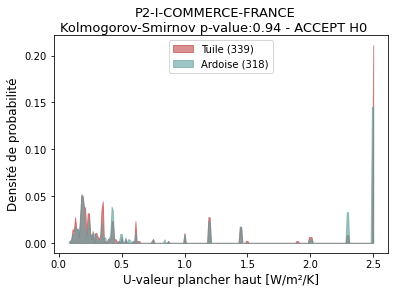

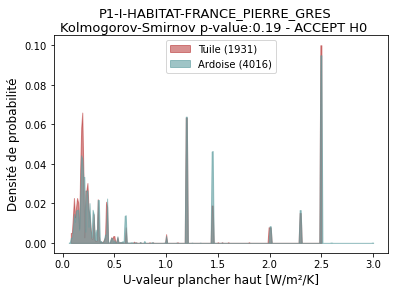

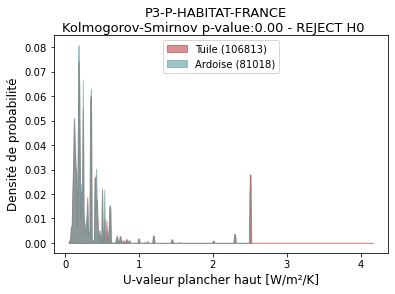

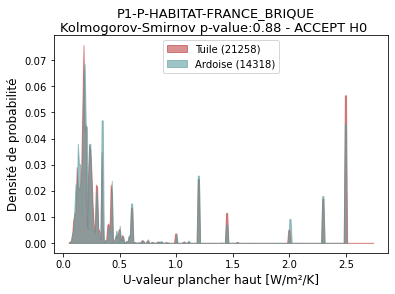

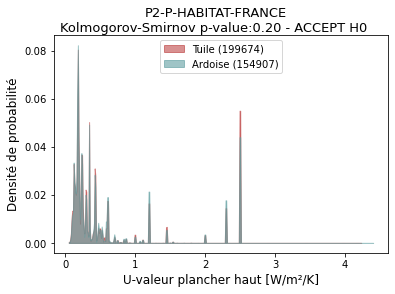

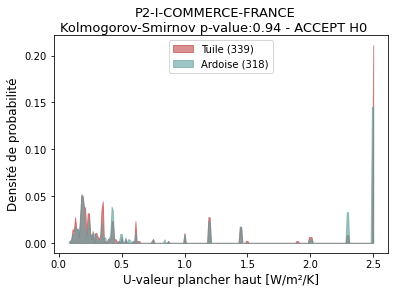

In [117]:
# Apply density_pdf_kolmogorov to to_analyse_pairs
summary = []
for pair in to_analyse_pairs:
    # define which file is "tuile" and which is "ardoise"
    if "TUILE" in pair[0]:
        tuile_file = pair[0]
        ardoise_file = pair[1]
    else:
        tuile_file = pair[1]
        ardoise_file = pair[0]  
    print("\ntuile :",tuile_file)
    print("ardoise :",ardoise_file)

    # read csv
    tuile = pd.read_csv(rf"{folder}\{tuile_file}")
    ardoise = pd.read_csv(rf"{folder}\{ardoise_file}")

    # select dpe data for the ceiling 
    tuile_dpe = tuile[tuile['adedpe202006_logtype_ph_u'].notna()]
    ardoise_dpe = ardoise[ardoise['adedpe202006_logtype_ph_u'].notna()]

    # define title 
    title_start = "-".join(tuile_file.split("-")[1:-1]) 
    title_wall = "_".join(tuile_file.split("-")[-1].split("_")[:-1])
    title = '-'.join([title_start, title_wall])

    p_value, hypot, chi_p_value, hypot_chi = density_pdf_kolmogorov(title, tuile_dpe, ardoise_dpe)
    summary.append([title, p_value, hypot, chi_p_value, hypot_chi, len(tuile_dpe), len(ardoise_dpe)])


In [123]:
# summary of to_analyse_pairs
summary_to_analyse = pd.DataFrame(summary, columns = ["archetype_mur", "ks_p_value", "ks_H0", "chi_p_value", "H0_chi","len tuile_dpe", "len ardoise_dpe"])
summary_to_analyse.round(2)

,archetype_mur,p_value,H0,len tuile_dpe,len ardoise_dpe
0,P2-I-COMMERCE-FRANCE,0.94,ACCEPT,339,318
1,P1-I-HABITAT-FRANCE_PIERRE_GRES,0.19,ACCEPT,1931,4016
2,P3-P-HABITAT-FRANCE,0.00,REJECT,106813,81018
3,P1-P-HABITAT-FRANCE_BRIQUE,0.88,ACCEPT,21258,14318
4,P2-P-HABITAT-FRANCE,0.20,ACCEPT,199674,154907
5,P2-I-COMMERCE-FRANCE,0.94,ACCEPT,339,318


### Pairs with more than 300 cases

In [124]:
# pairs with at least 300 cases for each element
two_ceil_more300 = [['len_1653-P7-I-TERTIAIRE-FRANCE_TUILE.csv',
  'len_776-P7-I-TERTIAIRE-FRANCE_ARDOISE.csv'],
 ['len_390-P4-I-TERTIAIRE-FRANCE_ARDOISE.csv',
  'len_771-P4-I-TERTIAIRE-FRANCE_TUILE.csv'],
 ['len_26317-P1-I-HABITAT-FRANCE_TERRE_TUILE.csv',
  'len_3938-P1-I-HABITAT-FRANCE_TERRE_ARDOISE.csv'],
 ['len_1909-P1-I-COMMERCE-FRANCE_PIERRE_GRES_ARDOISE.csv',
  'len_768-P1-I-COMMERCE-FRANCE_PIERRE_GRES_TUILE.csv'],
 ['len_21796-P1-P-HABITAT-FRANCE_PIERRE_GRANITE_TUILE.csv',
  'len_456990-P1-P-HABITAT-FRANCE_PIERRE_GRANITE_ARDOISE.csv'],
 ['len_117709-P1-P-HABITAT-FRANCE_PIERRE_SCHISTE_TUILE.csv',
  'len_77634-P1-P-HABITAT-FRANCE_PIERRE_SCHISTE_ARDOISE.csv'],
 ['len_12336-P1-I-HABITAT-FRANCE_PIERRE_SCHISTE_TUILE.csv',
  'len_7624-P1-I-HABITAT-FRANCE_PIERRE_SCHISTE_ARDOISE.csv'],
 ['len_378-P1-BA-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv',
  'len_941-P1-BA-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv'],
 ['len_16219-P7-I-HABITAT-FRANCE_ARDOISE.csv',
  'len_46289-P7-I-HABITAT-FRANCE_TUILE.csv'],
 ['len_1206-P1-BA-HABITAT-FRANCE_BRIQUE_ARDOISE.csv',
  'len_4429-P1-BA-HABITAT-FRANCE_BRIQUE_TUILE.csv'],
 ['len_33800-P1-I-HABITAT-FRANCE_PIERRE_MEULIERE_TUILE.csv',
  'len_5240-P1-I-HABITAT-FRANCE_PIERRE_MEULIERE_ARDOISE.csv'],
 ['len_337811-P7-P-HABITAT-FRANCE_ARDOISE.csv',
  'len_554560-P7-P-HABITAT-FRANCE_TUILE.csv'],
 ['len_267026-P1-P-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv',
  'len_681550-P1-P-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv'],
 ['len_10582-P1-I-HABITAT-FRANCE_BOIS_TUILE.csv',
  'len_6091-P1-I-HABITAT-FRANCE_BOIS_ARDOISE.csv'],
 ['len_1033225-P4-P-HABITAT-FRANCE_TUILE.csv',
  'len_603485-P4-P-HABITAT-FRANCE_ARDOISE.csv'],
 ['len_407-P7-I-COMMERCE-FRANCE_ARDOISE.csv',
  'len_968-P7-I-COMMERCE-FRANCE_TUILE.csv'],
 ['len_13321-P1-I-HABITAT-FRANCE_PIERRE_GRANITE_TUILE.csv',
  'len_26222-P1-I-HABITAT-FRANCE_PIERRE_GRANITE_ARDOISE.csv'],
 ['len_354-P1-I-TERTIAIRE-FRANCE_PIERRE_GRES_TUILE.csv',
  'len_845-P1-I-TERTIAIRE-FRANCE_PIERRE_GRES_ARDOISE.csv'],
 ['len_25062-P5-I-HABITAT-FRANCE_ARDOISE.csv',
  'len_65687-P5-I-HABITAT-FRANCE_TUILE.csv'],
 ['len_242734-P1-P-HABITAT-FRANCE_PIERRE_MEULIERE_TUILE.csv',
  'len_44205-P1-P-HABITAT-FRANCE_PIERRE_MEULIERE_ARDOISE.csv'],
 ['len_2718-P5-BA-HABITAT-FRANCE_TUILE.csv',
  'len_772-P5-BA-HABITAT-FRANCE_ARDOISE.csv'],
 ['len_539518-P5-P-HABITAT-FRANCE_ARDOISE.csv',
  'len_989544-P5-P-HABITAT-FRANCE_TUILE.csv'],
 ['len_33943-P6-I-HABITAT-FRANCE_ARDOISE.csv',
  'len_97304-P6-I-HABITAT-FRANCE_TUILE.csv'],
 ['len_1505-P5-I-COMMERCE-FRANCE_TUILE.csv',
  'len_771-P5-I-COMMERCE-FRANCE_ARDOISE.csv'],
 ['len_1207450-P1-P-HABITAT-FRANCE_BRIQUE_TUILE.csv',
  'len_836506-P1-P-HABITAT-FRANCE_BRIQUE_ARDOISE.csv'],
 ['len_1582-P6-BA-HABITAT-FRANCE_ARDOISE.csv',
  'len_4321-P6-BA-HABITAT-FRANCE_TUILE.csv'],
 ['len_2839-P7-BA-HABITAT-FRANCE_TUILE.csv',
  'len_976-P7-BA-HABITAT-FRANCE_ARDOISE.csv'],
 ['len_2586-P4-BA-HABITAT-FRANCE_TUILE.csv',
  'len_730-P4-BA-HABITAT-FRANCE_ARDOISE.csv'],
 ['len_38711-P1-P-HABITAT-FRANCE_BOIS_ARDOISE.csv',
  'len_84773-P1-P-HABITAT-FRANCE_BOIS_TUILE.csv'],
 ['len_442-P3-I-TERTIAIRE-FRANCE_ARDOISE.csv',
  'len_862-P3-I-TERTIAIRE-FRANCE_TUILE.csv'],
 ['len_1956-P2-I-COMMERCE-FRANCE_ARDOISE.csv',
  'len_2513-P2-I-COMMERCE-FRANCE_TUILE.csv'],
 ['len_18106-P3-I-HABITAT-FRANCE_ARDOISE.csv',
  'len_49536-P3-I-HABITAT-FRANCE_TUILE.csv'],
 ['len_40593-P1-I-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv',
  'len_57251-P1-I-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv'],
 ['len_2120-P1-I-COMMERCE-FRANCE_BRIQUE_ARDOISE.csv',
  'len_4033-P1-I-COMMERCE-FRANCE_BRIQUE_TUILE.csv'],
 ['len_160113-P2-I-HABITAT-FRANCE_TUILE.csv',
  'len_64627-P2-I-HABITAT-FRANCE_ARDOISE.csv'],
 ['len_1343-P2-I-TERTIAIRE-FRANCE_ARDOISE.csv',
  'len_2313-P2-I-TERTIAIRE-FRANCE_TUILE.csv'],
 ['len_187199-P1-P-HABITAT-FRANCE_TERRE_TUILE.csv',
  'len_64012-P1-P-HABITAT-FRANCE_TERRE_ARDOISE.csv'],
 ['len_1060-P5-I-TERTIAIRE-FRANCE_ARDOISE.csv',
  'len_2204-P5-I-TERTIAIRE-FRANCE_TUILE.csv'],
 ['len_1186724-P2-P-HABITAT-FRANCE_ARDOISE.csv',
  'len_1689405-P2-P-HABITAT-FRANCE_TUILE.csv'],
 ['len_133688-P1-I-HABITAT-FRANCE_BRIQUE_TUILE.csv',
  'len_43967-P1-I-HABITAT-FRANCE_BRIQUE_ARDOISE.csv'],
 ['len_373-P4-I-COMMERCE-FRANCE_ARDOISE.csv',
  'len_733-P4-I-COMMERCE-FRANCE_TUILE.csv'],
 ['len_1161416-P3-P-HABITAT-FRANCE_TUILE.csv',
  'len_834454-P3-P-HABITAT-FRANCE_ARDOISE.csv'],
 ['len_426-P3-I-COMMERCE-FRANCE_ARDOISE.csv',
  'len_698-P3-I-COMMERCE-FRANCE_TUILE.csv'],
 ['len_1120-P1-I-TERTIAIRE-FRANCE_BRIQUE_ARDOISE.csv',
  'len_2014-P1-I-TERTIAIRE-FRANCE_BRIQUE_TUILE.csv'],
 ['len_1333563-P6-P-HABITAT-FRANCE_TUILE.csv',
  'len_857101-P6-P-HABITAT-FRANCE_ARDOISE.csv'],
 ['len_1672-P2-BA-HABITAT-FRANCE_ARDOISE.csv',
  'len_4680-P2-BA-HABITAT-FRANCE_TUILE.csv'],
 ['len_1167-P3-BA-HABITAT-FRANCE_ARDOISE.csv',
  'len_3061-P3-BA-HABITAT-FRANCE_TUILE.csv'],
 ['len_1739-P6-I-TERTIAIRE-FRANCE_ARDOISE.csv',
  'len_3805-P6-I-TERTIAIRE-FRANCE_TUILE.csv'],
 ['len_13286-P4-I-HABITAT-FRANCE_ARDOISE.csv',
  'len_38667-P4-I-HABITAT-FRANCE_TUILE.csv'],
 ['len_1067-P6-I-COMMERCE-FRANCE_ARDOISE.csv',
  'len_2108-P6-I-COMMERCE-FRANCE_TUILE.csv']]

In [125]:
# filter out the cases analysed before
two_ceil_300_not_before = [ pair for pair in two_ceil_more300 if pair not in to_analyse_pairs]


tuile : len_1653-P7-I-TERTIAIRE-FRANCE_TUILE.csv
ardoise : len_776-P7-I-TERTIAIRE-FRANCE_ARDOISE.csv
len_dens_ard 241
len_dens_tui 241
YES! 
P_value 0.999: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_771-P4-I-TERTIAIRE-FRANCE_TUILE.csv
ardoise : len_390-P4-I-TERTIAIRE-FRANCE_ARDOISE.csv
len_dens_ard 240
len_dens_tui 241
YES! 
P_value 0.901: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_26317-P1-I-HABITAT-FRANCE_TERRE_TUILE.csv
ardoise : len_3938-P1-I-HABITAT-FRANCE_TERRE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (67,125,147,191,240,291,293,295,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (191,291) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 241
len_dens_tui 243
P_value 0.037: reject the null hypothesis! 
Significantly different data, considering a significancy of 0.05 .

tuile : len_768-P1-I-COMMERCE-FRANCE_PIERRE_GRES_TUILE.csv
ardoise : len_1909-P1-I-COMMERCE-FRANCE_PIERRE_GRES_ARDOISE.csv
len_dens_ard 242
len_dens_tui 239
YES! 
P_value 0.87: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_21796-P1-P-HABITAT-FRANCE_PIERRE_GRANITE_TUILE.csv
ardoise : len_456990-P1-P-HABITAT-FRANCE_PIERRE_GRANITE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,14,15,17,18,23,24,29,45,46,67,124,125,127,128,129,130,132,133,134,135,136,137,138,140,141,142,143,144,145,146,147,149,150,151,152,154,155,156,157,160,161,162,164,165,166,167,185,187,191,240,291,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,125,142,147,150,191,192,193,240,243,291,293,294,295,296,297,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 243
len_dens_tui 238
P_value 0.0: reject the null hypothesis! 
Significantly different data, considering a significancy of 0.05 .

tuile : len_117709-P1-P-HABITAT-FRANCE_PIERRE_SCHISTE_TUILE.csv
ardoise : len_77634-P1-P-HABITAT-FRANCE_PIERRE_SCHISTE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,125,142,147,150,191,240,242,243,295) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,125,132,142,147,149,150,157,162,164,191,240,291,293,295,297) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 243
len_dens_tui 245
YES! 
P_value 0.455: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_12336-P1-I-HABITAT-FRANCE_PIERRE_SCHISTE_TUILE.csv
ardoise : len_7624-P1-I-HABITAT-FRANCE_PIERRE_SCHISTE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,46,67,125,132,147,150,191,240,291,293,296) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (125,147,191,291,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 242
len_dens_tui 241
YES! 
P_value 0.991: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_378-P1-BA-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv
ardoise : len_941-P1-BA-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv
len_dens_ard 238
len_dens_tui 234
YES! 
P_value 0.91: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_46289-P7-I-HABITAT-FRANCE_TUILE.csv
ardoise : len_16219-P7-I-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (119,120,122,291,292,293,325) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (291,292,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 245
len_dens_tui 245
YES! 
P_value 0.82: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_4429-P1-BA-HABITAT-FRANCE_BRIQUE_TUILE.csv
ardoise : len_1206-P1-BA-HABITAT-FRANCE_BRIQUE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,46,67,125,147,240,291,292,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 240
len_dens_tui 240
YES! 
P_value 0.51: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_33800-P1-I-HABITAT-FRANCE_PIERRE_MEULIERE_TUILE.csv
ardoise : len_5240-P1-I-HABITAT-FRANCE_PIERRE_MEULIERE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (42,43,44,45,46,47,48,49,67,125,147,191,197,214,240,291,293,325,327,335) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 244
len_dens_tui 243
YES! 
P_value 0.204: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_554560-P7-P-HABITAT-FRANCE_TUILE.csv
ardoise : len_337811-P7-P-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,119,120,122,125,142,147,150,191,192,193,197,214,240,242,243,287,291,293,294,295,296,322,325,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,125,147,191,197,214,240,242,243,291,293,294,295,296,297,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 246
len_dens_tui 246
YES! 
P_value 0.987: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_267026-P1-P-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv
ardoise : len_681550-P1-P-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,125,142,147,149,150,157,162,164,191,197,214,240,242,243,291,292,293,294,295,296,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,125,142,147,150,191,197,214,240,291,292,293,294,295,296,300,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 458
len_dens_tui 246
P_value 0.0: reject the null hypothesis! 
Significantly different data, considering a significancy of 0.05 .

tuile : len_10582-P1-I-HABITAT-FRANCE_BOIS_TUILE.csv
ardoise : len_6091-P1-I-HABITAT-FRANCE_BOIS_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (147,191,291,292,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (191) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 242
len_dens_tui 245
YES! 
P_value 0.535: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_1033225-P4-P-HABITAT-FRANCE_TUILE.csv
ardoise : len_603485-P4-P-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,14,15,17,18,23,24,29,42,43,44,45,46,47,48,49,67,107,119,120,122,124,125,127,128,129,130,132,133,134,135,136,137,138,140,141,142,143,144,145,146,147,149,150,151,152,154,155,156,157,160,161,162,164,165,166,167,185,187,190,191,192,193,197,214,240,242,243,287,291,292,293,294,295,296,297,299,322,325,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,125,142,147,191,197,214,240,242,243,291,293,294,295,296,297,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 246
len_dens_tui 246
YES! 
P_value 0.601: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_968-P7-I-COMMERCE-FRANCE_TUILE.csv
ardoise : len_407-P7-I-COMMERCE-FRANCE_ARDOISE.csv
len_dens_ard 241
len_dens_tui 241
YES! 
P_value 0.999: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_13321-P1-I-HABITAT-FRANCE_PIERRE_GRANITE_TUILE.csv
ardoise : len_26222-P1-I-HABITAT-FRANCE_PIERRE_GRANITE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,14,15,17,18,23,24,29,45,46,67,124,125,127,128,129,130,132,133,134,135,136,137,138,140,141,142,143,144,145,146,149,150,151,152,154,155,156,157,160,161,162,164,165,166,167,185,187,191,240,242,243,291,293,295) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (125,147,191,291,292,293,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 243
len_dens_tui 243
P_value 0.0: reject the null hypothesis! 
Significantly different data, considering a significancy of 0.05 .

tuile : len_354-P1-I-TERTIAIRE-FRANCE_PIERRE_GRES_TUILE.csv
ardoise : len_845-P1-I-TERTIAIRE-FRANCE_PIERRE_GRES_ARDOISE.csv
len_dens_ard 240
len_dens_tui 237
YES! 
P_value 0.854: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_65687-P5-I-HABITAT-FRANCE_TUILE.csv
ardoise : len_25062-P5-I-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (119,120,122,147,191,291,292,293,325) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (42,43,44,45,46,47,48,49,67,147,197,214,240,291,293,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 285
len_dens_tui 295
YES! 
P_value 0.979: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_242734-P1-P-HABITAT-FRANCE_PIERRE_MEULIERE_TUILE.csv
ardoise : len_44205-P1-P-HABITAT-FRANCE_PIERRE_MEULIERE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,125,128,132,136,140,142,146,147,149,150,157,162,164,191,192,193,197,214,240,291,293,294,295,296,325,327,335) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,125,147,191,192,193,240,291,293,295,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 245
len_dens_tui 246
YES! 
P_value 0.701: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_2718-P5-BA-HABITAT-FRANCE_TUILE.csv
ardoise : len_772-P5-BA-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 241
len_dens_tui 245
YES! 
P_value 0.197: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_989544-P5-P-HABITAT-FRANCE_TUILE.csv
ardoise : len_539518-P5-P-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\AppData\Local\Temp/ipykernel_19432/1587908471.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,14,15,17,18,23,24,29,42,43,44,45,46,47,48,49,67,119,120,122,124,125,127,128,129,130,132,133,134,135,136,137,138,140,141,142,143,144,145,146,147,149,150,151,152,154,155,156,157,160,161,162,164,165,166,167,185,187,191,192,193,197,214,240,242,243,287,291,292,293,294,295,296,322,325,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (

len_dens_ard 246
len_dens_tui 246
YES! 
P_value 0.456: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_97304-P6-I-HABITAT-FRANCE_TUILE.csv
ardoise : len_33943-P6-I-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,46,67,119,120,122,147,191,240,291,293,325) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (42,43,44,45,46,47,48,49,197,214,291,292,293,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 246
len_dens_tui 286
YES! 
P_value 0.595: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_1505-P5-I-COMMERCE-FRANCE_TUILE.csv
ardoise : len_771-P5-I-COMMERCE-FRANCE_ARDOISE.csv
len_dens_ard 243
len_dens_tui 240
YES! 
P_value 0.923: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_4321-P6-BA-HABITAT-FRANCE_TUILE.csv
ardoise : len_1582-P6-BA-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (147,291,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 241
len_dens_tui 241
YES! 
P_value 0.964: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_2839-P7-BA-HABITAT-FRANCE_TUILE.csv
ardoise : len_976-P7-BA-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (291,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 243
len_dens_tui 245
YES! 
P_value 0.371: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_2586-P4-BA-HABITAT-FRANCE_TUILE.csv
ardoise : len_730-P4-BA-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,46,147,291,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 244
len_dens_tui 241
YES! 
P_value 0.929: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_84773-P1-P-HABITAT-FRANCE_BOIS_TUILE.csv
ardoise : len_38711-P1-P-HABITAT-FRANCE_BOIS_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,147,191,240,291,293,295,296,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,125,142,147,150,191,240,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 245
len_dens_tui 245
YES! 
P_value 0.191: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_862-P3-I-TERTIAIRE-FRANCE_TUILE.csv
ardoise : len_442-P3-I-TERTIAIRE-FRANCE_ARDOISE.csv
len_dens_ard 238
len_dens_tui 243
YES! 
P_value 0.599: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_49536-P3-I-HABITAT-FRANCE_TUILE.csv
ardoise : len_18106-P3-I-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (119,120,122,147,291,292,293,325) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 315
len_dens_tui 352
YES! 
P_value 0.056: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_4033-P1-I-COMMERCE-FRANCE_BRIQUE_TUILE.csv
ardoise : len_2120-P1-I-COMMERCE-FRANCE_BRIQUE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,46,107,125,190,191,291,293,295,299,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 239
len_dens_tui 241
YES! 
P_value 0.914: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_160113-P2-I-HABITAT-FRANCE_TUILE.csv
ardoise : len_64627-P2-I-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (42,43,44,45,46,47,48,49,119,120,122,147,191,197,214,291,292,293,322,325,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (42,43,44,45,46,47,48,49,147,197,214,291,292,293,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 416
len_dens_tui 413
P_value 0.021: reject the null hypothesis! 
Significantly different data, considering a significancy of 0.05 .

tuile : len_2313-P2-I-TERTIAIRE-FRANCE_TUILE.csv
ardoise : len_1343-P2-I-TERTIAIRE-FRANCE_ARDOISE.csv
len_dens_ard 281
len_dens_tui 241
YES! 
P_value 0.998: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_187199-P1-P-HABITAT-FRANCE_TERRE_TUILE.csv
ardoise : len_64012-P1-P-HABITAT-FRANCE_TERRE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,125,142,147,150,191,240,291,292,293,295,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,45,46,67,125,142,147,149,150,157,162,164,191,240,291,293,294,295,296,297,300) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 243
len_dens_tui 245
YES! 
P_value 0.065: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_2204-P5-I-TERTIAIRE-FRANCE_TUILE.csv
ardoise : len_1060-P5-I-TERTIAIRE-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,46,119,120,122,291,292,293,325) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 240
len_dens_tui 290
YES! 
P_value 0.968: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_133688-P1-I-HABITAT-FRANCE_BRIQUE_TUILE.csv
ardoise : len_43967-P1-I-HABITAT-FRANCE_BRIQUE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (67,125,147,191,240,291,292,293,294,295,296,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (125,147,191,291,292,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 285
len_dens_tui 329
YES! 
P_value 0.627: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_733-P4-I-COMMERCE-FRANCE_TUILE.csv
ardoise : len_373-P4-I-COMMERCE-FRANCE_ARDOISE.csv
len_dens_ard 239
len_dens_tui 243
YES! 
P_value 0.939: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_698-P3-I-COMMERCE-FRANCE_TUILE.csv
ardoise : len_426-P3-I-COMMERCE-FRANCE_ARDOISE.csv
len_dens_ard 240
len_dens_tui 241
YES! 
P_value 0.85: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_2014-P1-I-TERTIAIRE-FRANCE_BRIQUE_TUILE.csv
ardoise : len_1120-P1-I-TERTIAIRE-FRANCE_BRIQUE_ARDOISE.csv
len_dens_ard 241
len_dens_tui 241
YES! 
P_value 0.986: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_1333563-P6-P-HABITAT-FRANCE_TUILE.csv
ardoise : len_8

C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,14,15,17,18,23,24,29,42,43,44,45,46,47,48,49,67,119,120,122,124,125,127,128,129,130,132,133,134,135,136,137,138,140,141,142,143,144,145,146,147,149,150,151,152,154,155,156,157,160,161,162,164,165,166,167,185,187,191,192,193,197,214,240,242,243,287,291,292,293,294,295,296,297,322,325,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29,42,43,44,45,46,47,48,49,67,125,147,191,197,214,240,242,243,291,293,294,295,296,322,328,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 246
len_dens_tui 246
YES! 
P_value 0.751: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_4680-P2-BA-HABITAT-FRANCE_TUILE.csv
ardoise : len_1672-P2-BA-HABITAT-FRANCE_ARDOISE.csv
len_dens_ard 244
len_dens_tui 244
YES! 
P_value 0.595: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_3061-P3-BA-HABITAT-FRANCE_TUILE.csv
ardoise : len_1167-P3-BA-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (147,291) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 239
len_dens_tui 245
YES! 
P_value 0.571: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_3805-P6-I-TERTIAIRE-FRANCE_TUILE.csv
ardoise : len_1739-P6-I-TERTIAIRE-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (119,120,122,147,325) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 240
len_dens_tui 241
YES! 
P_value 0.553: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_38667-P4-I-HABITAT-FRANCE_TUILE.csv
ardoise : len_13286-P4-I-HABITAT-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (147,291,292,293) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 245
len_dens_tui 295
YES! 
P_value 0.31: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_2108-P6-I-COMMERCE-FRANCE_TUILE.csv
ardoise : len_1067-P6-I-COMMERCE-FRANCE_ARDOISE.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (45,46,67,119,120,122,125,132,240,325) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 241
len_dens_tui 242
YES! 
P_value 0.945: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .


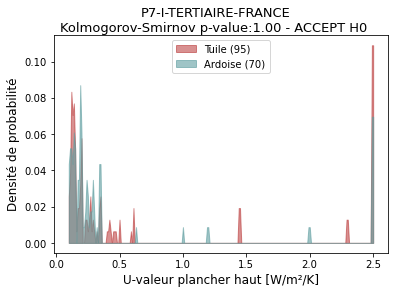

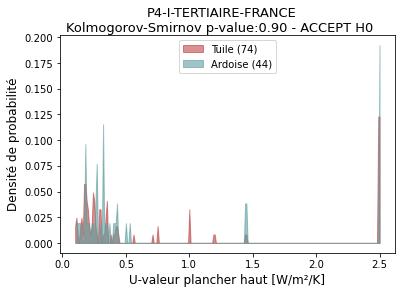

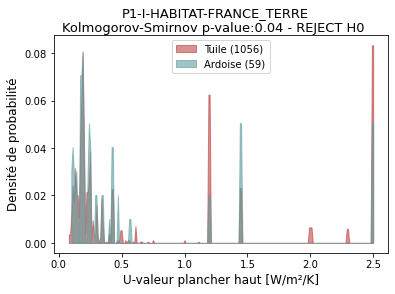

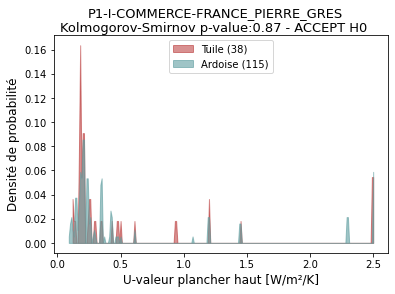

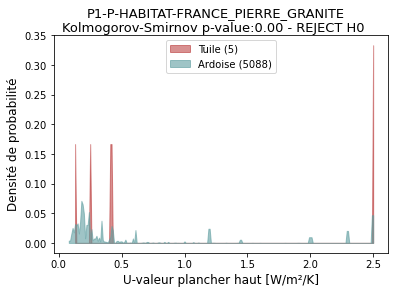

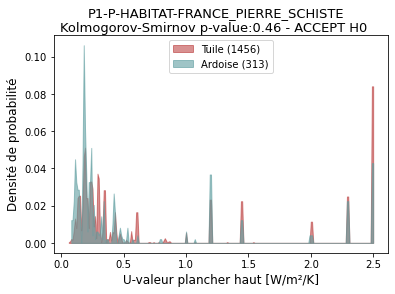

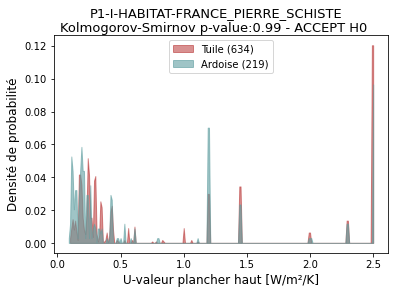

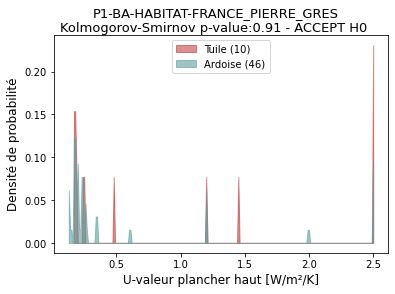

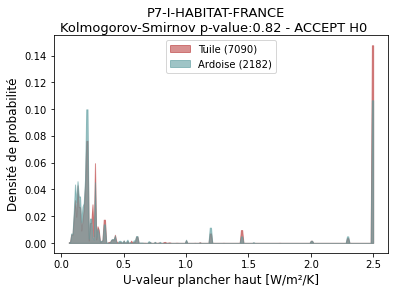

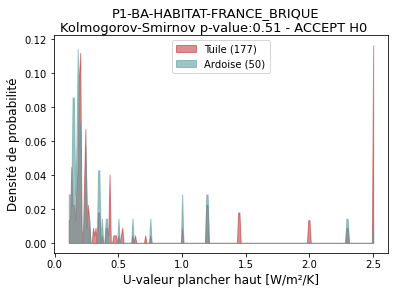

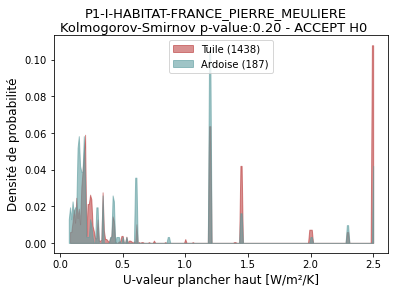

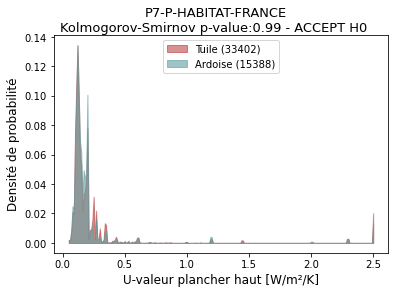

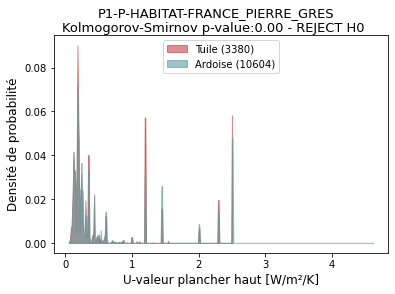

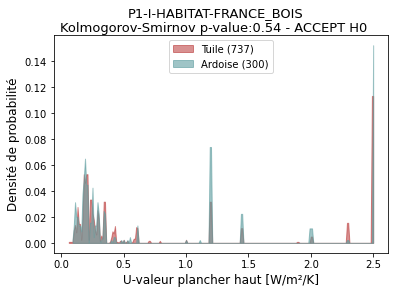

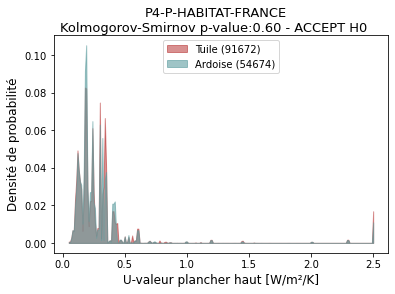

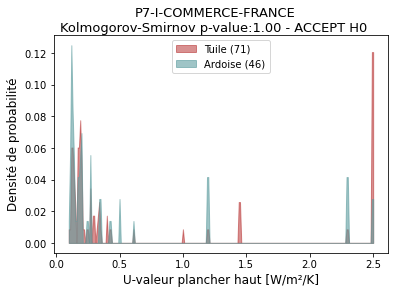

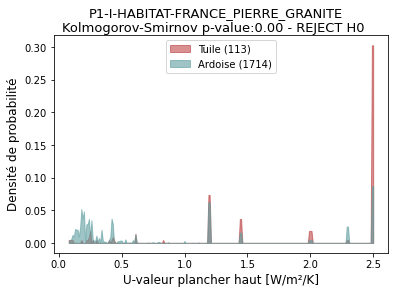

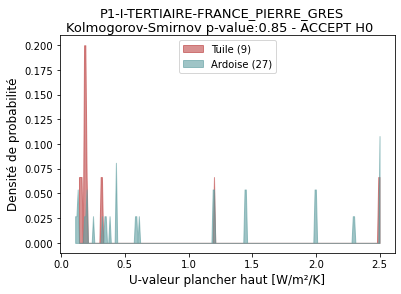

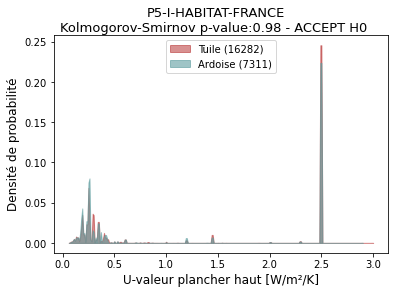

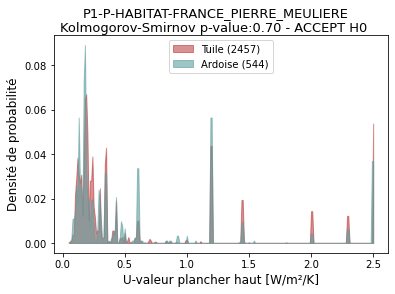

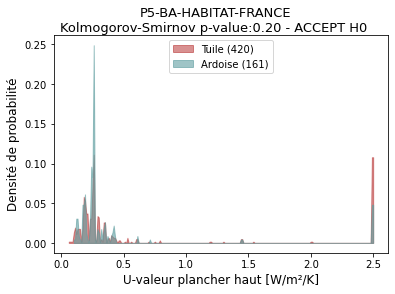

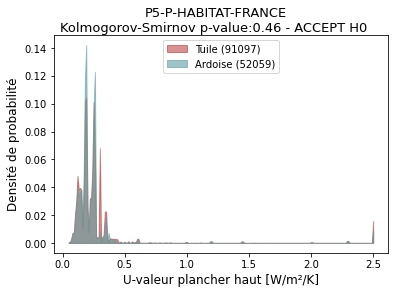

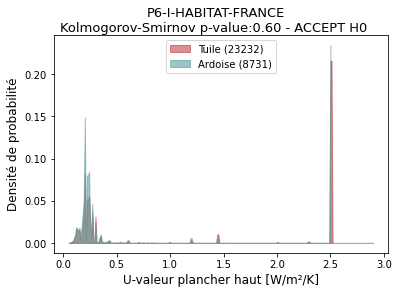

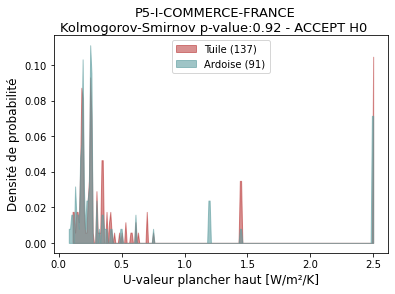

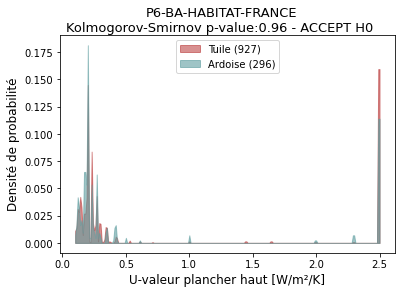

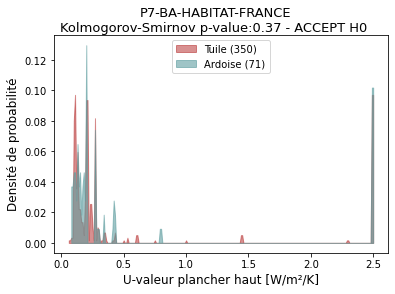

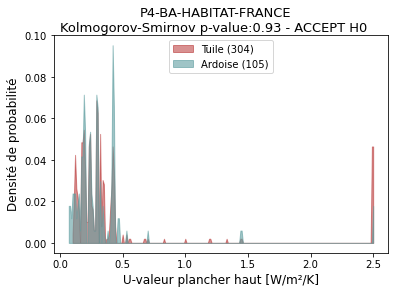

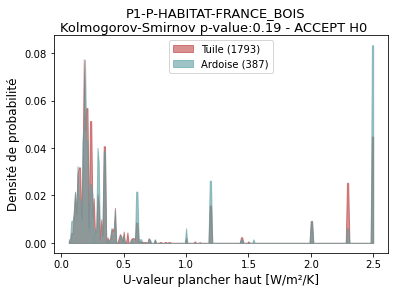

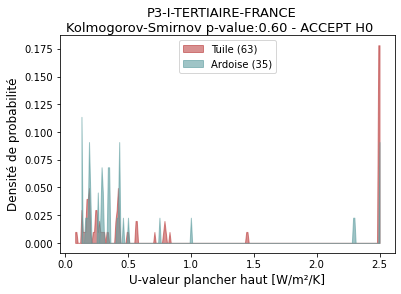

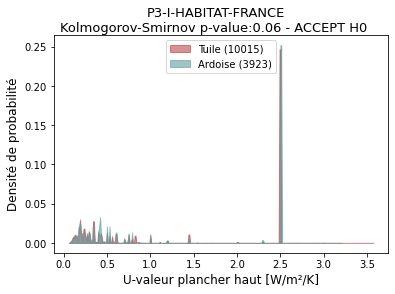

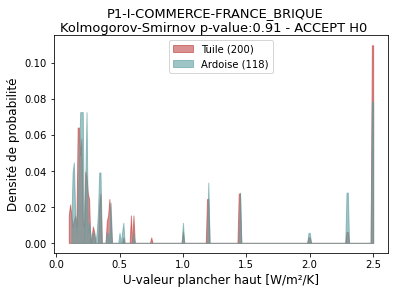

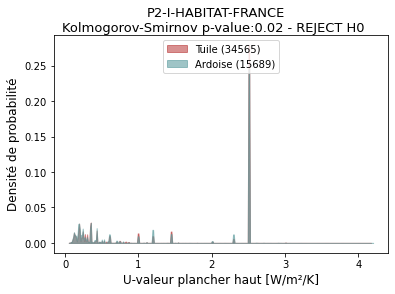

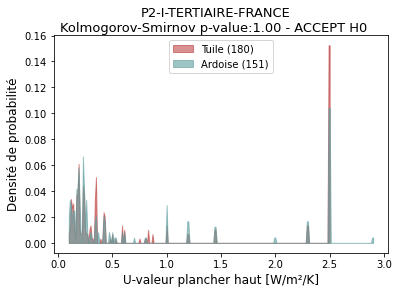

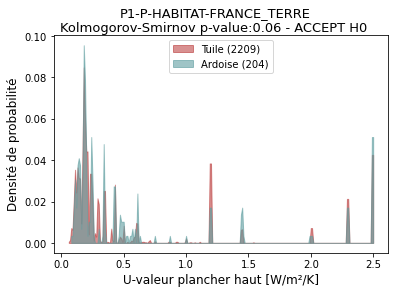

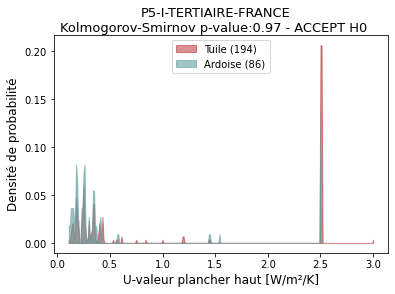

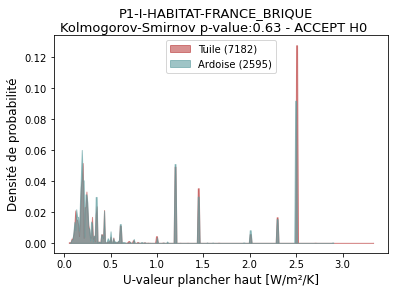

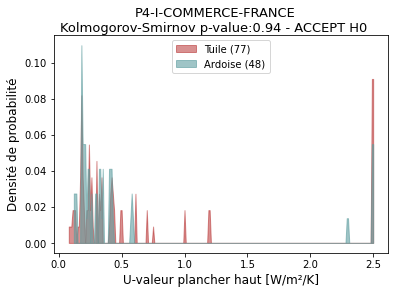

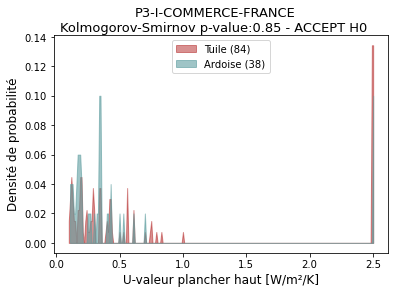

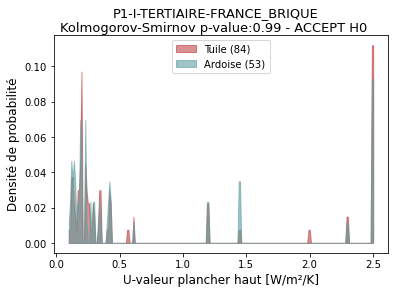

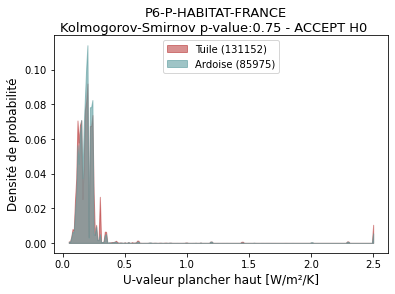

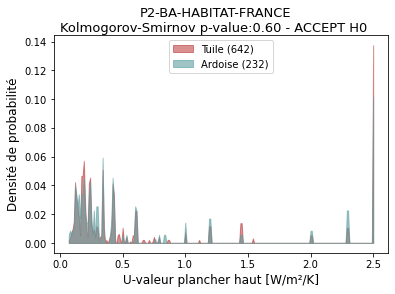

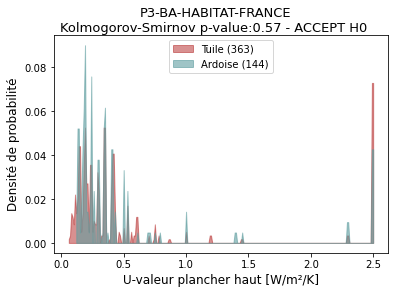

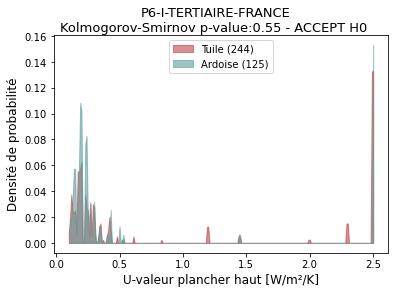

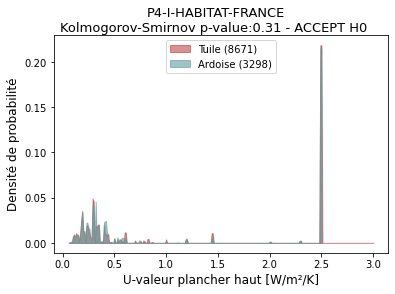

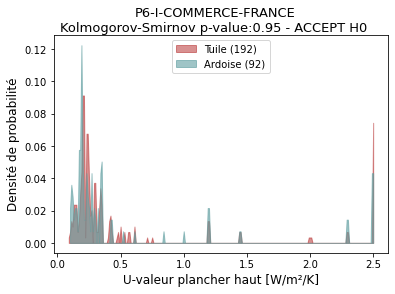

In [126]:
# Apply density_pdf_kolmogorov to two_ceil_300_not_before
summary_300 = []
for pair in two_ceil_300_not_before:
    # define which file is "tuile" and which is "ardoise"
    if "TUILE" in pair[0]:
        tuile_file = pair[0]
        ardoise_file = pair[1]
    else:
        tuile_file = pair[1]
        ardoise_file = pair[0]  
    print("\ntuile :",tuile_file)
    print("ardoise :",ardoise_file)

    # read csv
    tuile = pd.read_csv(rf"{folder}\{tuile_file}")
    ardoise = pd.read_csv(rf"{folder}\{ardoise_file}")

    # select dpe data for the ceiling 
    tuile_dpe = tuile[tuile['adedpe202006_logtype_ph_u'].notna()]
    ardoise_dpe = ardoise[ardoise['adedpe202006_logtype_ph_u'].notna()]

    # define title 
    title_start = "-".join(tuile_file.split("-")[1:-1]) 
    title_wall = "_".join(tuile_file.split("-")[-1].split("_")[:-1])
    title = '-'.join([title_start, title_wall])

    p_value, hypot, chi_p_value, hypot_chi = density_pdf_kolmogorov(title, tuile_dpe, ardoise_dpe)
    summary_300.append([title, p_value, hypot, chi_p_value, hypot_chi, len(tuile_dpe), len(ardoise_dpe)])

In [49]:
# summary of two_ceil_300_not_before
summary_300_df = pd.DataFrame(summary_300, columns = ["archetype_mur", "ks_p_value", "ks_H0", "chi_p_value", "H0_chi","len tuile_dpe", "len ardoise_dpe"]).round(2)
summary_300_df.sort_values("p_value")

NameError: name 'summary_300' is not defined

In [180]:
len(summary_300_df)

45

In [182]:
len(summary_300_df.archetype_mur.unique())

45

### All pairs 

In [2]:
# all the pair of ceilings
# folder = r"C:\Users\ldecarva\Documents\Data\gpd_sorting_output\archetypes_concatenated"
folder = r"G:\Post-doc_LMDC_Paendora2\Paendora2_data\3_gpd_sorting_output\concat_archetypes\final_selection\final_after_assemble"
files = os.listdir(folder)
start = ["-".join(file.split("-")[1:-1]) for file in files]
ter_mur = ["_".join(file.split("-")[-1].split("_")[:-1]) for file in files]
print(ter_mur[60])
n = range(len(start))
arch_ter_murs = ['-'.join([start[i], ter_mur[i]]) for i in n]

two_ceilings = []
for arch_mur in arch_ter_murs:
    same_mur = []
    for file in files:
        if arch_mur in file:
            same_mur.append(file)
    if len(same_mur) == 2:
        two_ceilings.append(same_mur)
# take out repetead values
print(len(two_ceilings))
two_ceilings.sort()
two_ceilings = list(two_ceilings for two_ceilings,_ in itertools.groupby(two_ceilings))
len(two_ceilings)

FRANCE_PIERRE_CALCAIRE
21


11


tuile : len_163354-P1-I-HABITAT-FRANCE_BRIQUE_TUILE.csv
ardoise : len_10576-P1-I-HABITAT-FRANCE_BRIQUE_ARDOISE.csv
len_dens_ard 243
len_dens_tui 329
YES! 
K-S P_value 0.225: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .
size_sample:  550  - len tuile:  9075  - len ardoise:  550
len_dens_ard 243
len_dens_tui 242
len_dens 242


C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\scipy\stats\stats.py:6707: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\scipy\stats\stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


YES! 
P_value nan: accept the null hypothesis chi square! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_1780281-P1-P-HABITAT-FRANCE_BRIQUE_TUILE.csv
ardoise : len_185625-P1-P-HABITAT-FRANCE_BRIQUE_ARDOISE.csv


C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,36,52,53,74,114,132,149,154,157,197,198,199,200,247,249,250,298,299,300,301,302,303,304,306,307) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,36,52,53,74,132,149,154,157,198,247,298,299,300,301,302,303) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 245
len_dens_tui 270
YES! 
K-S P_value 0.458: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .
size_sample:  2279  - len tuile:  32554  - len ardoise:  2279
len_dens_ard 245
len_dens_tui 245
len_dens 245
YES! 
P_value nan: accept the null hypothesis chi square! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_184-P3-I-BATIMENT DE SANTE-FRANCE_TUILE.csv
ardoise : len_40-P3-I-BATIMENT DE SANTE-FRANCE_ARDOISE.csv

tuile : len_78431-P1-I-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv
ardoise : len_19413-P1-I-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv


C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,49,50,51,52,53,54,55,56,74,132,154,198,204,221,247,298,299,300) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,132,154,198,298,300) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 293
len_dens_tui 255
YES! 
K-S P_value 0.057: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .
size_sample:  1726  - len tuile:  4221  - len ardoise:  1726
len_dens_ard 293
len_dens_tui 244
len_dens 244
YES! 
P_value nan: accept the null hypothesis chi square! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_207422-P1-P-HABITAT-FRANCE_PIERRE_GRANITE_TUILE.csv
ardoise : len_330029-P1-P-HABITAT-FRANCE_PIERRE_GRANITE_ARDOISE.csv


C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,20,21,22,24,25,30,31,36,52,53,74,126,127,129,131,132,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,153,154,156,157,158,159,161,162,163,164,167,168,169,171,172,173,174,192,194,198,199,200,247,250,294,298,300,301,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,36,52,53,74,132,139,149,154,156,157,164,169,171,198,247,298,300,301,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 243
len_dens_tui 243
YES! 
K-S P_value 0.593: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .
size_sample:  1596  - len tuile:  1596  - len ardoise:  3775
len_dens_ard 243
len_dens_tui 243
len_dens 243
YES! 
P_value nan: accept the null hypothesis chi square! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_62-P1-I-BATIMENT DE SANTE-FRANCE_PIERRE_ARDOISE.csv
ardoise : len_21-P1-I-BATIMENT DE SANTE-FRANCE_PIERRE_CALCAIRE_ZINC.csv

tuile : len_23622-P1-I-HABITAT-FRANCE_PIERRE_GRANITE_TUILE.csv
ardoise : len_21525-P1-I-HABITAT-FRANCE_PIERRE_GRANITE_ARDOISE.csv


C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,20,21,22,24,25,30,31,52,53,74,126,127,129,131,132,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,153,156,157,158,159,161,162,163,164,167,168,169,171,172,173,174,192,194,198,199,200,247,294,298,300) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,132,154,198,298,299,300) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 243
len_dens_tui 243
YES! 
K-S P_value 0.929: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .
size_sample:  590  - len tuile:  590  - len ardoise:  1422
len_dens_ard 242
len_dens_tui 243
len_dens 242
YES! 
P_value nan: accept the null hypothesis chi square! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_2774-P1-I-TERTIAIRE-FRANCE_BRIQUE_TUILE.csv
ardoise : len_244-P1-I-TERTIAIRE-FRANCE_BRIQUE_ARDOISE.csv


C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (154,298,300) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 238
len_dens_tui 241
YES! 
K-S P_value 0.143: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .
size_sample:  14  - len tuile:  123  - len ardoise:  14
len_dens_ard 238
len_dens_tui 238
len_dens 238
YES! 
P_value nan: accept the null hypothesis chi square! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_263-P1-I-TERTIAIRE-FRANCE_PIERRE_GRANITE_TUILE.csv
ardoise : len_383-P1-I-TERTIAIRE-FRANCE_PIERRE_GRANITE_ARDOISE.csv

tuile : len_525613-P1-P-HABITAT-FRANCE_PIERRE_GRES_TUILE.csv
ardoise : len_423024-P1-P-HABITAT-FRANCE_PIERRE_GRES_ARDOISE.csv


C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,36,49,50,51,52,53,54,55,56,74,132,149,154,156,157,164,169,171,198,199,200,204,221,247,250,298,299,300,301,302,303) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\lorena.carvalho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,36,52,53,74,132,149,154,198,247,298,299,300,301,302,303,307) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_ard 246
len_dens_tui 458
K-S P_value 0.001: reject the null hypothesis! 
Significantly different data, considering a significancy of 0.05 .
size_sample:  6502  - len tuile:  7481  - len ardoise:  6502
len_dens_ard 246
len_dens_tui 458
len_dens 246
YES! 
P_value nan: accept the null hypothesis chi square! 
Non significantly different data, considering a significancy of 0.05 .

tuile : len_746-P1-I-TERTIAIRE-FRANCE_PIERRE_GRES_TUILE.csv
ardoise : len_453-P1-I-TERTIAIRE-FRANCE_PIERRE_GRES_ARDOISE.csv
len_dens_ard 240
len_dens_tui 238
YES! 
K-S P_value 0.703: accept the null hypothesis! 
Non significantly different data, considering a significancy of 0.05 .
size_sample:  14  - len tuile:  22  - len ardoise:  14
len_dens_ard 240
len_dens_tui 238
len_dens 238
YES! 
P_value nan: accept the null hypothesis chi square! 
Non significantly different data, considering a significancy of 0.05 .


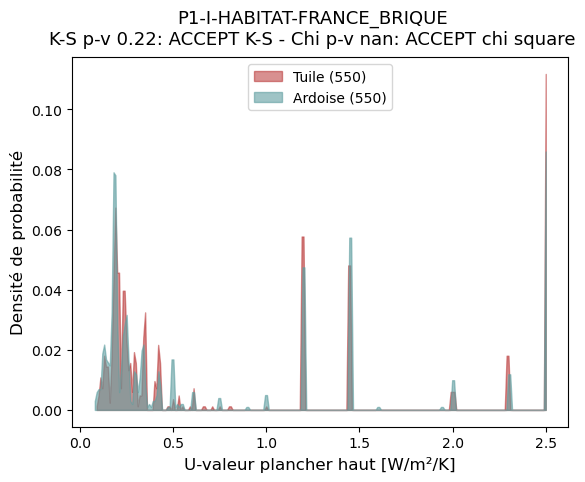

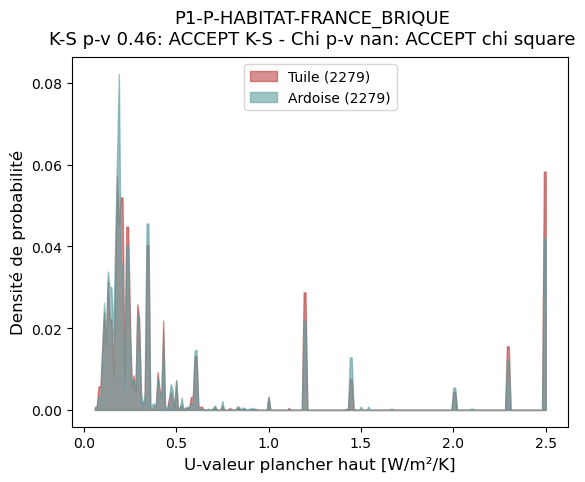

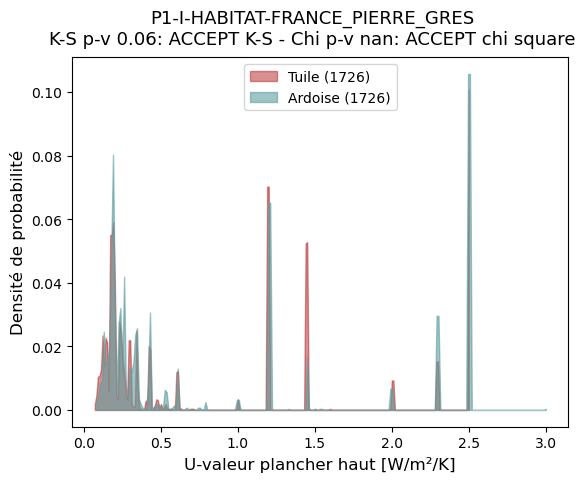

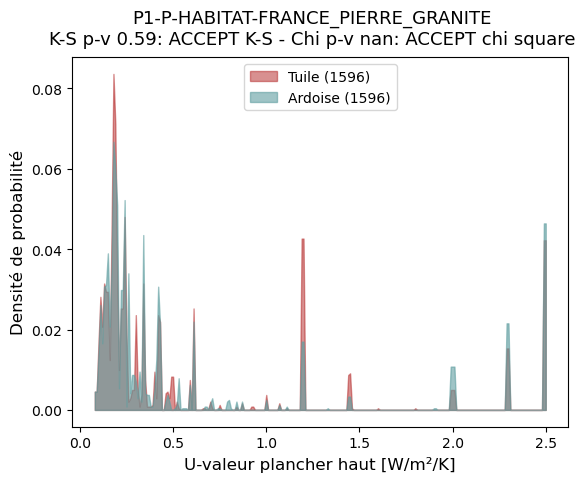

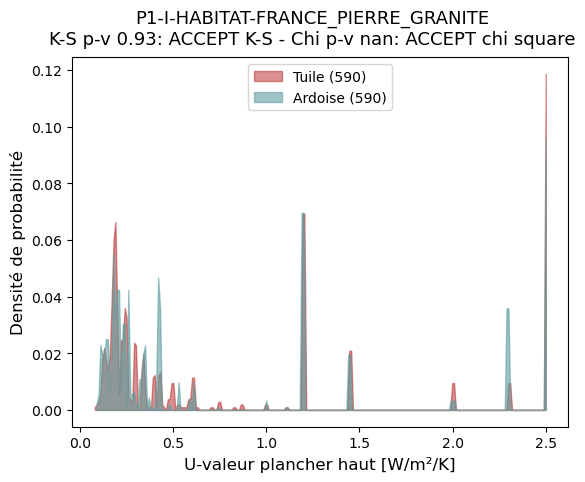

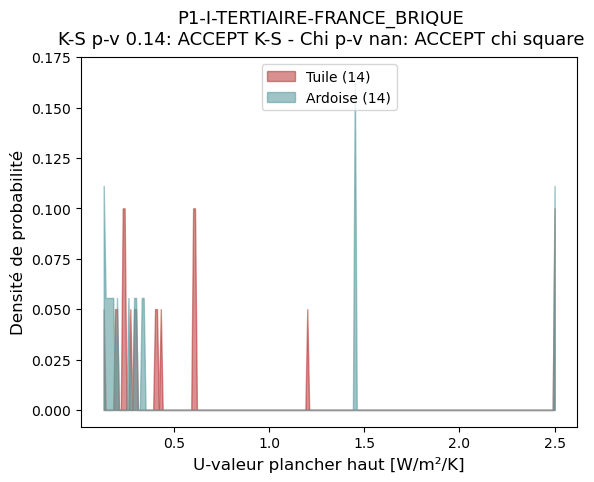

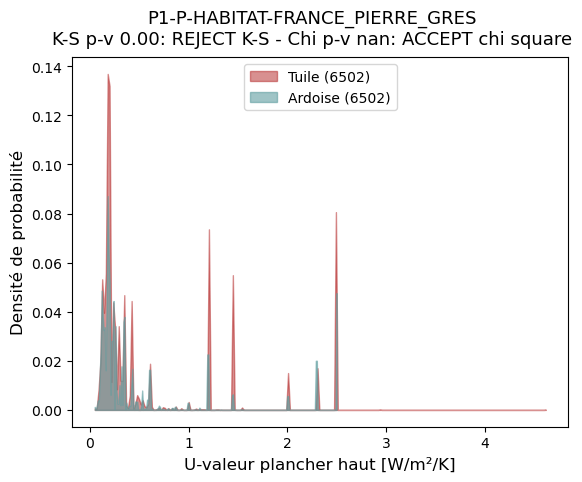

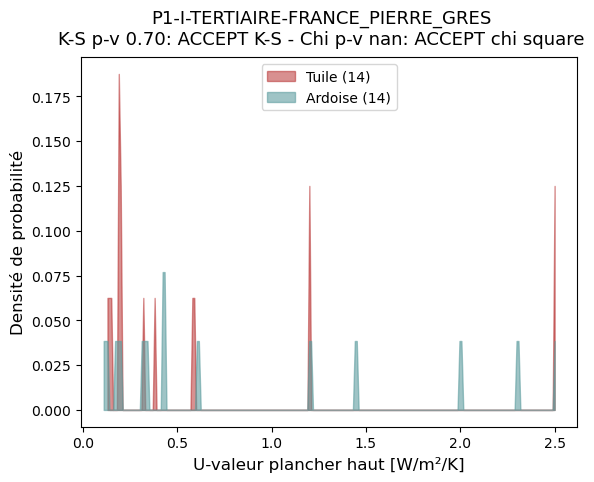

In [6]:
summary_all = []
for pair in two_ceilings:
    # define which file is "tuile" and which is "ardoise"
    if "TUILE" in pair[0]:
        tuile_file = pair[0]
        ardoise_file = pair[1]
    else:
        tuile_file = pair[1]
        ardoise_file = pair[0]  
    print("\ntuile :",tuile_file)
    print("ardoise :",ardoise_file)

    # read csv
    tuile = pd.read_csv(rf"{folder}\{tuile_file}")
    ardoise = pd.read_csv(rf"{folder}\{ardoise_file}")

    # select dpe data for the ceiling 
    tuile_dpe = tuile[tuile['adedpe202006_logtype_ph_u'].notna()]
    ardoise_dpe = ardoise[ardoise['adedpe202006_logtype_ph_u'].notna()]
    
    # impose a minimun of 10 DPE cases to continue the analysis 
    if (len(tuile_dpe) > 10) & (len(ardoise_dpe) > 10):

        # define title 
        title_start = "-".join(tuile_file.split("-")[1:-1]) 
        title_wall = "_".join(tuile_file.split("-")[-1].split("_")[:-1])
        title = '-'.join([title_start, title_wall])

        p_value, hypot, chi_p_value, hypot_chi = density_pdf_kolmogorov(title, tuile_dpe, ardoise_dpe)
        summary_all.append([title, p_value, hypot, chi_p_value, hypot_chi, len(tuile_dpe), len(ardoise_dpe)])

In [7]:
# summary of all archetypes_mur with at least 10 dpe cases
summary_all_df = pd.DataFrame(summary_all, columns = ["archetype_mur", "ks_p_value", "ks_H0", "chi_p_value", "H0_chi","len tuile_dpe", "len ardoise_dpe"]).round(2)
print(len(summary_all_df))
summary_all_df

8


,archetype_mur,ks_p_value,ks_H0,chi_p_value,H0_chi,len tuile_dpe,len ardoise_dpe
0,P1-I-HABITAT-FRANCE_BRIQUE,0.22,ACCEPT K-S,NaN,ACCEPT chi square,9075,550
1,P1-P-HABITAT-FRANCE_BRIQUE,0.46,ACCEPT K-S,NaN,ACCEPT chi square,32554,2279
2,P1-I-HABITAT-FRANCE_PIERRE_GRES,0.06,ACCEPT K-S,NaN,ACCEPT chi square,4221,1726
3,P1-P-HABITAT-FRANCE_PIERRE_GRANITE,0.59,ACCEPT K-S,NaN,ACCEPT chi square,1596,3775
4,P1-I-HABITAT-FRANCE_PIERRE_GRANITE,0.93,ACCEPT K-S,NaN,ACCEPT chi square,590,1422
5,P1-I-TERTIAIRE-FRANCE_BRIQUE,0.14,ACCEPT K-S,NaN,ACCEPT chi square,123,14
6,P1-P-HABITAT-FRANCE_PIERRE_GRES,0.00,REJECT K-S,NaN,ACCEPT chi square,7481,6502
7,P1-I-TERTIAIRE-FRANCE_PIERRE_GRES,0.70,ACCEPT K-S,NaN,ACCEPT chi square,22,14


In [8]:
summary_all_df.groupby("ks_H0").count()

,archetype_mur,ks_p_value,chi_p_value,H0_chi,len tuile_dpe,len ardoise_dpe
ks_H0,,,,,,
ACCEPT K-S,7,7,0,7,7,7
REJECT K-S,1,1,0,1,1,1


In [9]:
summary_all_df[summary_all_df.ks_H0 == "REJECT K-S"]

,archetype_mur,ks_p_value,ks_H0,chi_p_value,H0_chi,len tuile_dpe,len ardoise_dpe
6,P1-P-HABITAT-FRANCE_PIERRE_GRES,0.0,REJECT K-S,NaN,ACCEPT chi square,7481,6502


In [ ]:
summary_all_df = summary_all_df.sort_values(['H0', 'len tuile_dpe' ],ascending=False)

In [ ]:
summary_all_df.to_excel(r"plot_hist_pdf_cdf\pdf_kolmogorov\summary_kolmogorov.xlsx",index=False)

In [28]:
size_sample = int(min(len(tuile_dpe),len(ardoise_dpe)))
print("size_sample: ", size_sample, " - len tuile: ", len(tuile_dpe), " - len ardoise: ",len(ardoise_dpe))
data_tuile_ = random.sample(list(tuile_dpe.adedpe202006_logtype_ph_u), size_sample)
data_ardoise_ = random.sample(list(ardoise_dpe.adedpe202006_logtype_ph_u), size_sample)
#Create density and unity density for each data with same size
x_ard = data_ardoise_
len_dens_ard = round((max(x_ard) - min(x_ard))/0.01)+1
x_tui = data_tuile_
len_dens_tui = round((max(x_tui) - min(x_tui))/0.01)+1
lens_dens = min(len_dens_ard,len_dens_tui)
print("len_dens_ard", len_dens_ard)
print("len_dens_tui",len_dens_tui)
print("len_dens",lens_dens)

x_d_ard = np.linspace(min(x_ard), max(x_ard), lens_dens)
density_ard = sum((abs(xi - x_d_ard) < 0.01) for xi in x_ard)
unity_density_ard = density_ard / density_ard.sum()

x_tui = data_tuile_
len_dens_tui = round((max(x_tui) - min(x_tui))/0.01)+1
x_d_tui = np.linspace(min(x_tui), max(x_tui), lens_dens)
density_tui = sum((abs(xi - x_d_tui) < 0.01) for xi in x_tui)
unity_density_tui = density_tui / density_tui.sum()

size_sample:  313  - len tuile:  1456  - len ardoise:  313
len_dens_ard 243
len_dens_tui 241
len_dens 241


In [46]:
chi_s_test = stats.chisquare(f_obs=list(unity_density_tui), f_exp=list(unity_density_ard))

In [43]:
chi_s_test.pvalue


nan

In [42]:
list(unity_density_tui)

[0.007619047619047619,
 0.02095238095238095,
 0.02857142857142857,
 0.015238095238095238,
 0.013333333333333334,
 0.017142857142857144,
 0.009523809523809525,
 0.04380952380952381,
 0.04380952380952381,
 0.05714285714285714,
 0.03619047619047619,
 0.007619047619047619,
 0.005714285714285714,
 0.02666666666666667,
 0.045714285714285714,
 0.030476190476190476,
 0.007619047619047619,
 0.013333333333333334,
 0.0,
 0.02857142857142857,
 0.03238095238095238,
 0.0038095238095238095,
 0.0,
 0.007619047619047619,
 0.03238095238095238,
 0.02666666666666667,
 0.0,
 0.007619047619047619,
 0.0,
 0.005714285714285714,
 0.0019047619047619048,
 0.005714285714285714,
 0.017142857142857144,
 0.015238095238095238,
 0.0038095238095238095,
 0.0,
 0.0,
 0.0019047619047619048,
 0.0038095238095238095,
 0.0,
 0.0019047619047619048,
 0.0,
 0.0019047619047619048,
 0.0,
 0.0,
 0.0,
 0.009523809523809525,
 0.0019047619047619048,
 0.0,
 0.0,
 0.0,
 0.02095238095238095,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [36]:
list(unity_density_tui)

[0.007619047619047619,
 0.02095238095238095,
 0.02857142857142857,
 0.015238095238095238,
 0.013333333333333334,
 0.017142857142857144,
 0.009523809523809525,
 0.04380952380952381,
 0.04380952380952381,
 0.05714285714285714,
 0.03619047619047619,
 0.007619047619047619,
 0.005714285714285714,
 0.02666666666666667,
 0.045714285714285714,
 0.030476190476190476,
 0.007619047619047619,
 0.013333333333333334,
 0.0,
 0.02857142857142857,
 0.03238095238095238,
 0.0038095238095238095,
 0.0,
 0.007619047619047619,
 0.03238095238095238,
 0.02666666666666667,
 0.0,
 0.007619047619047619,
 0.0,
 0.005714285714285714,
 0.0019047619047619048,
 0.005714285714285714,
 0.017142857142857144,
 0.015238095238095238,
 0.0038095238095238095,
 0.0,
 0.0,
 0.0019047619047619048,
 0.0038095238095238095,
 0.0,
 0.0019047619047619048,
 0.0,
 0.0019047619047619048,
 0.0,
 0.0,
 0.0,
 0.009523809523809525,
 0.0019047619047619048,
 0.0,
 0.0,
 0.0,
 0.02095238095238095,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [ ]:
x_roof = dpe.adedpe202006_logtype_ph_u.to_numpy()
len_dens_roof = round((max(x_roof) - min(x_roof))/0.01)+1
print("len_dens_roof", len_dens_roof)
x_d_roof = np.linspace(min(x_roof), max(x_roof), len_dens_roof)
density_roof = sum((abs(xi - x_d_roof) < 0.01) for xi in x_roof)
unity_density_roof = density_roof / density_roof.sum()